# Customer Segmentation for E-Commerce Growth: A Data-Driven Approach for Olist Retail

## Business Problem

Olist Retail, a prominent online marketplace connecting Brazilian retailers with customers nationwide, faces a critical challenge in optimizing its operations. With thousands of customers showcasing diverse purchasing behaviors, Olist Retail struggles to design effective marketing strategies and personalized customer experiences. The lack of actionable insights into customer preferences and behaviors hampers the company's ability to boost sales, improve retention, and allocate resources efficiently.

To address this, Olist Retail seeks to implement customer segmentation using advanced clustering techniques. By leveraging the K-means algorithm, this project aims to identify distinct customer groups based on purchasing patterns, demographics, and order behaviors. These insights will empower Olist Retail to craft tailored marketing campaigns, enhance product recommendations, and foster stronger customer relationships, ultimately driving growth in a competitive e-commerce landscape.

# Importing libraries & dataset

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from scipy.stats import skew , boxcox


## reading dataset files

In [2]:
customers = pd.read_csv("olist_customers_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
orders_items = pd.read_csv("olist_order_items_dataset.csv")
orders_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders_payments = pd.read_csv("olist_order_payments_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")

## Merging different csv files to one dataframe

In [3]:
df = orders.merge(orders_items, on='order_id', how='inner')
df = df.merge(orders_payments, on='order_id', how='inner', validate='m:m')
df = df.merge(orders_reviews, on='order_id', how='inner')
df = df.merge(products, on='product_id', how='inner')
df = df.merge(customers, on='customer_id', how='inner')
df = df.merge(sellers, on='seller_id', how='inner')

# Exploratory Data Analysis (EDA)

## Investigating the dataset

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP


## Identifying number of rows and columns in the dataset

In [5]:
df.shape

(117329, 39)

In [6]:
df['payment_type'].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

## descriptive statistics about the data

In [7]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
count,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,115634.000000,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000,117329.000000,117329.000000
mean,1.194121,120.524349,20.027514,1.094452,2.940151,172.062565,4.031467,48.768018,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452,35060.118112,24450.781955
std,0.684225,182.944843,15.828077,0.731174,2.775370,265.388194,1.387927,10.033831,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875,29849.496175,27582.364358
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.750000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,6429.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.100000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,13660.000000
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.060000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58770.000000,28035.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,99730.000000


## basic information about the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

## converting dates and non string columns to their correct type

In [9]:
df["customer_city"]=df["customer_city"].astype('category')
df['customer_state']=df['customer_state'].astype('category')

df['product_category_name']=products['product_category_name'].astype('category')
df['product_name_lenght'] = pd.to_numeric(products['product_name_lenght'],errors='coerce')
df["product_description_lenght"]=pd.to_numeric(df["product_description_lenght"],errors='coerce')
df["product_photos_qty"]=pd.to_numeric(df["product_photos_qty"],errors='coerce')
df["product_weight_g"]=pd.to_numeric(df["product_weight_g"],errors='coerce')
df["product_length_cm"]=pd.to_numeric(df["product_length_cm"],errors='coerce')
df["product_height_cm"]=pd.to_numeric(df["product_height_cm"],errors='coerce')
df["product_width_cm"]=pd.to_numeric(df["product_width_cm"],errors='coerce')
df["shipping_limit_date"]=pd.to_datetime(df["shipping_limit_date"],errors='coerce')

df["order_status"]=orders["order_status"].astype('category')
df["order_purchase_timestamp"]=pd.to_datetime(df["order_purchase_timestamp"],errors='coerce')
df["order_approved_at"]=pd.to_datetime(df["order_approved_at"],errors='coerce')
df["order_delivered_carrier_date"]=pd.to_datetime(df["order_delivered_carrier_date"],errors='coerce')
df["order_delivered_customer_date"]=pd.to_datetime(df["order_delivered_customer_date"],errors='coerce')
df["order_estimated_delivery_date"]=pd.to_datetime(df["order_estimated_delivery_date"],errors='coerce')

df["seller_city"]=df["seller_city"].astype('category')
df["seller_state"]=df["seller_state"].astype('category')

df["payment_type"]=df["payment_type"].astype('category')

df["review_creation_date"]=pd.to_datetime(df["review_creation_date"],errors='coerce')
df["review_answer_timestamp"]=pd.to_datetime(df["review_answer_timestamp"],errors='coerce')

Checking that the columns are converted successfully

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   99441 non-null   category      
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116094 non-null  datetime64[ns]
 6   order_delivered_customer_date  114858 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   order_item_id                  117329 non-null  int64         
 9   product_id                     117329 non-null  object        
 10  seller_id                      117329 non-null  object        
 11  

## Checking for null values

In [11]:
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                      17888
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             103437
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
product_category_name             84988


Looks like that alot of null values exists , which if removed , might cause huge data loss , so we will proceed with null imputation strategy for each column containing nulls

In [12]:
# Impute nulls in order_status with "unknown"
df['order_status'] = df['order_status'].cat.add_categories(['Unknown'])

df['order_status'] = df['order_status'].fillna('Unknown')

# Impute `order_approved_at` with the median timestamp
df['order_approved_at'] = df['order_approved_at'].fillna(df['order_approved_at'].median())

#  Impute `order_delivered_carrier_date`
# Group by `order_status` and fill missing values with median of each group
df['order_delivered_carrier_date'] = df.groupby('order_status' ,observed=False)['order_delivered_carrier_date'].transform(
    lambda x: x.fillna(x.median())
)

# Impute `order_delivered_customer_date`
# Calculate average delivery time and estimate missing dates
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].fillna(
    df['order_purchase_timestamp'] + 
    (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).median()
)

# Impute `review_comment_title` with "No Title"
df['review_comment_title'] = df['review_comment_title'].fillna('No Title')

#  Impute `review_comment_message` with "No Comment"
df['review_comment_message'] = df['review_comment_message'].fillna('No Comment')

#  Impute `product_category_name` with "Unknown"
df['product_category_name'] = df['product_category_name'].cat.add_categories(['Unknown'])

df['product_category_name'] = df['product_category_name'].fillna('Unknown')

#  Impute `product_name_length`, `product_description_length`, and `product_photos_qty` with median
for col in ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']:
    df[col] = df[col].fillna(df[col].median())

# Impute weight and dimensions with median, grouped by `product_category_name`
for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    df[col] = df.groupby('product_category_name' ,observed=False)[col].transform(lambda x: x.fillna(x.median()))



Checking that no nulls still exists

In [13]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

## checking for duplicates

In [14]:
df.duplicated().sum()

0

## Checking for outliers

we will check for outliers in three features ('price', 'review_score', 'payment_installments')  , that will be used in the clustering later on

Outliers in 'price': 8785
Outliers in 'review_score': 18939
Outliers in 'payment_installments': 7983


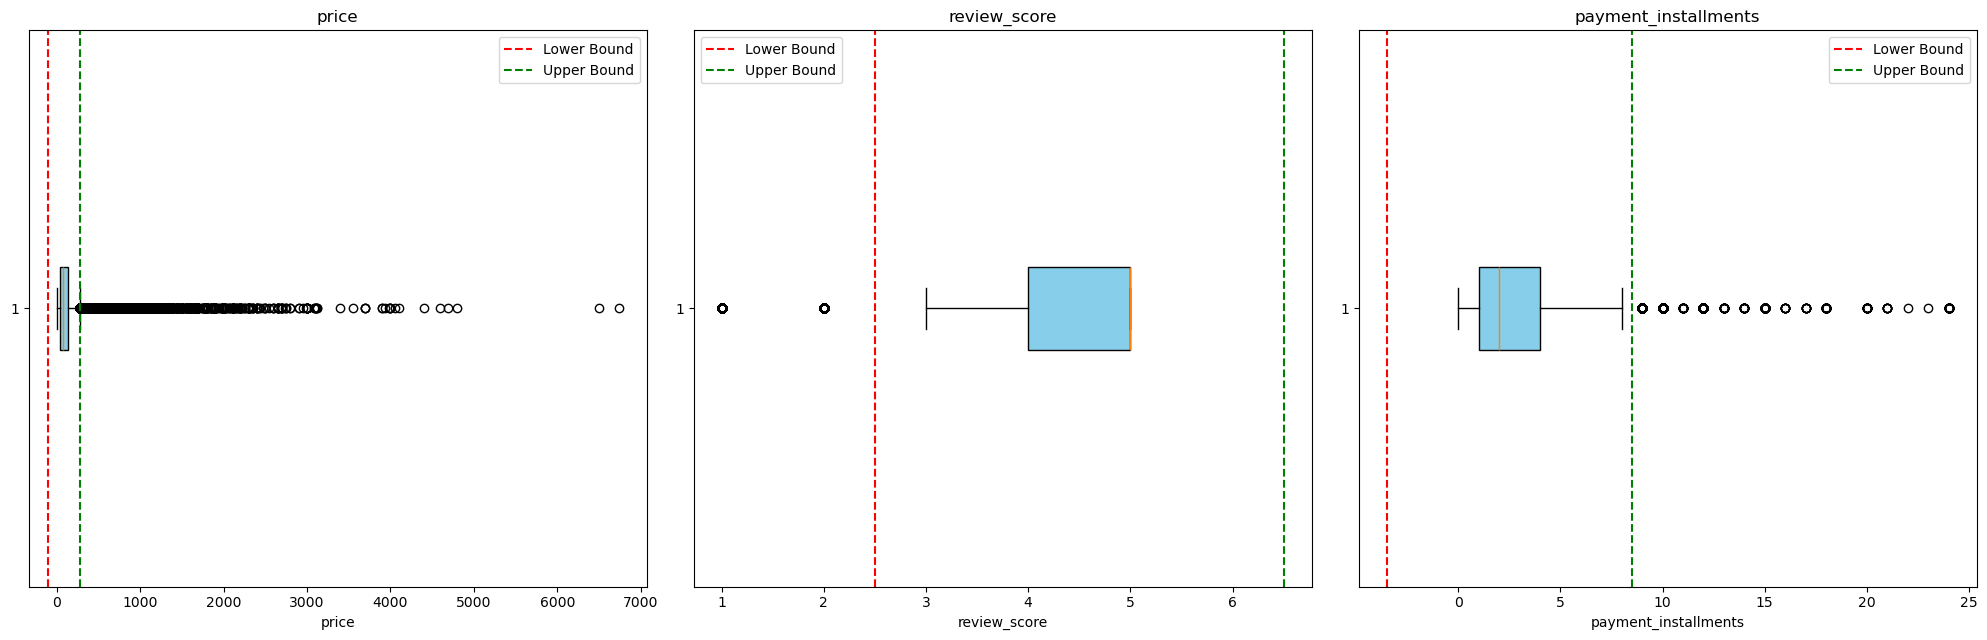

In [15]:
def detect_outliers_iqr(ncol, df, columns):
    plt.figure(figsize=(20, 6.5))
    # Loop through each column and create boxplots
    for i, column in enumerate(columns):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Outliers in '{column}': {len(outliers)}")

        # Create subplot for each variable
        plt.subplot(1, ncol, i + 1)
        plt.boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
        plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
        plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
        plt.title(f"{column}", fontsize=12)
        plt.xlabel(column)
        plt.legend()

    plt.tight_layout()
    plt.show()

# Example Usage
columns_to_check = ['price', 'review_score', 'payment_installments']
detect_outliers_iqr(len(columns_to_check), df, columns_to_check)


## checking for features distributions and skewness

In [16]:
skew(df[['price' , 'payment_installments' , 'review_score']], bias=False) 

array([ 7.65232828,  1.6211292 , -1.27087098])

In [17]:
def dist_plot(ncol, df,variables ):
    plt.figure(figsize=(20, 12))
    # Loop through each variable and create plots
    for i, var in enumerate(variables):
        plt.subplot(2, ncol, i + 1)
        sns.histplot(df[var], kde=True, bins=30, color='blue', alpha=0.6)
        plt.axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
        plt.axvline(df[var].median(), color='green', linestyle='--', label='Median')
        plt.title(f'Distribution of {var}', fontsize=14)
        plt.legend()


    plt.tight_layout()
    plt.show()


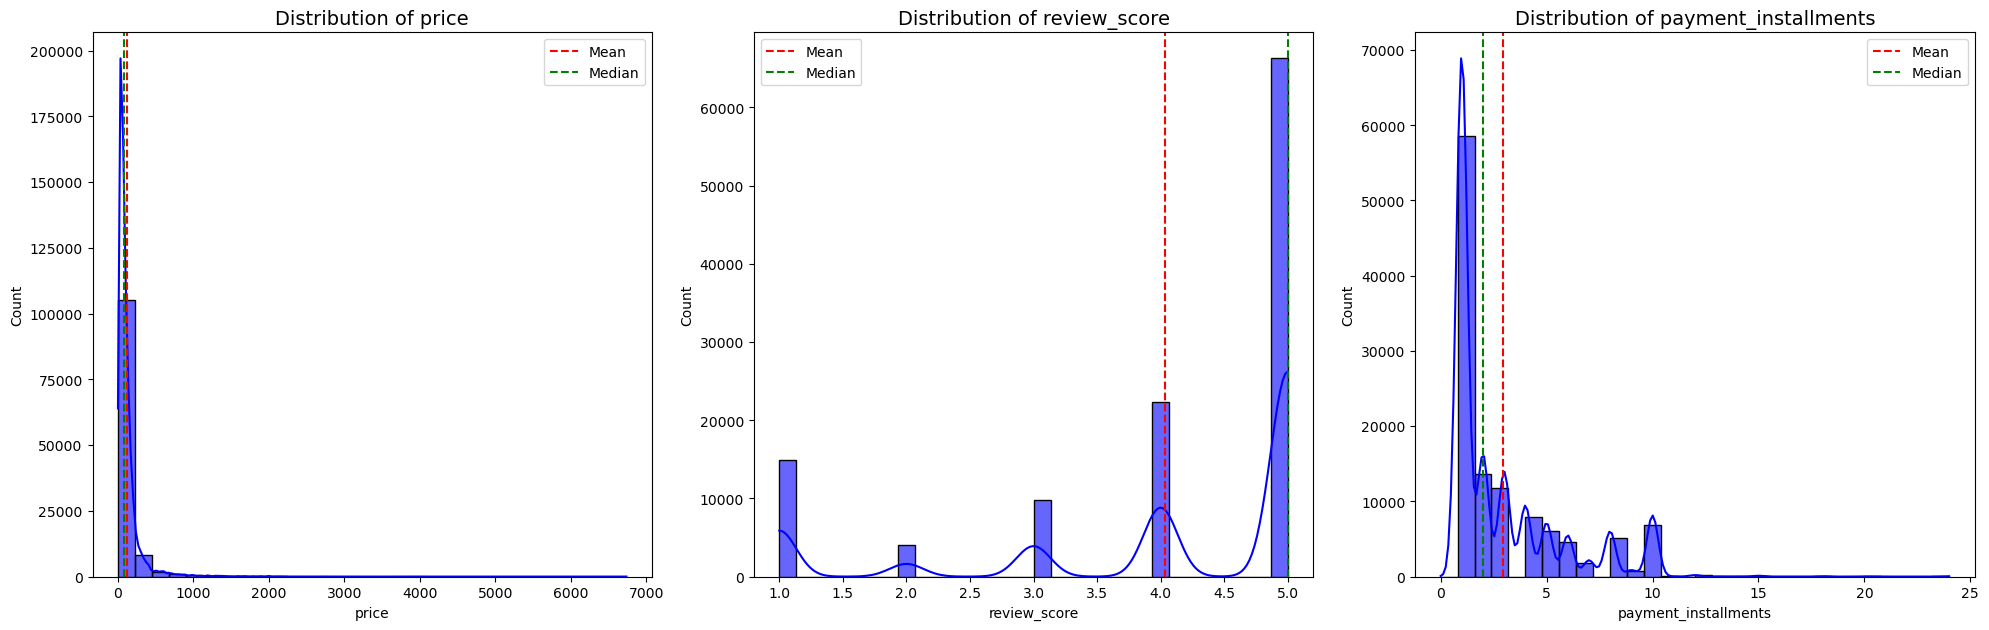

In [18]:
dist_plot(3,  df, variables = ['price', 'review_score', 'payment_installments'])

price and payment_installment are positively skewed , we will  apply log transformation to fix outliers and skewness in the features (we won't apply transformation on review_score since it's a discrete feature)

In [19]:
df["price"] = np.log1p(df["price"])
df["payment_installments"] = np.log1p(df["payment_installments"])

now let's have a look at the distribution after transformation

In [20]:
skew(df[['price' , 'payment_installments' , ]], bias=False) 

array([0.29586566, 0.82833943])

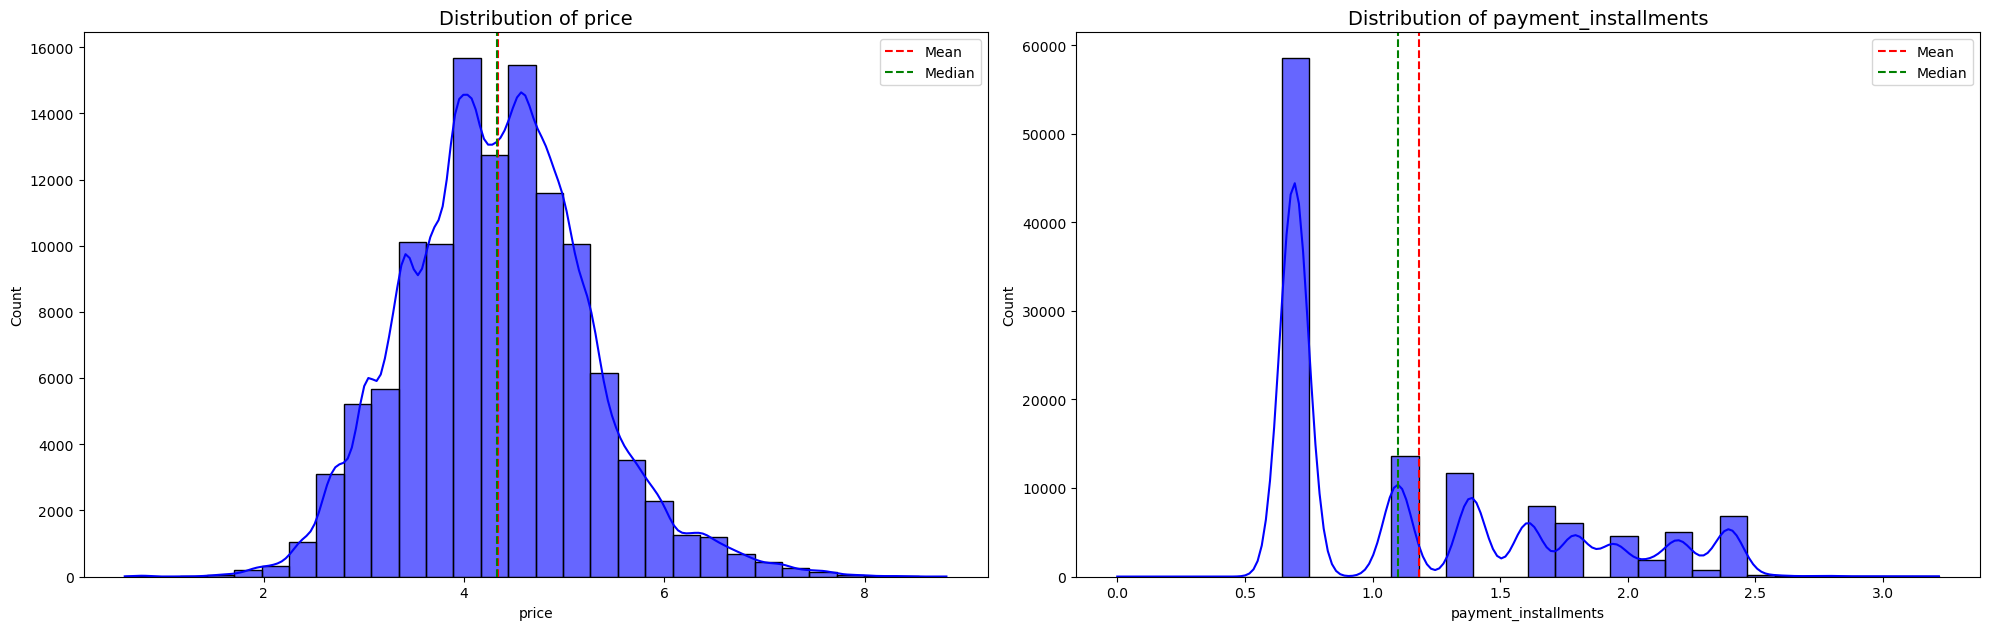

In [21]:
dist_plot(2, df, variables = ['price', 'payment_installments'])

let's check for the outliers after performing the transformation

Outliers in 'price': 1539
Outliers in 'payment_installments': 62


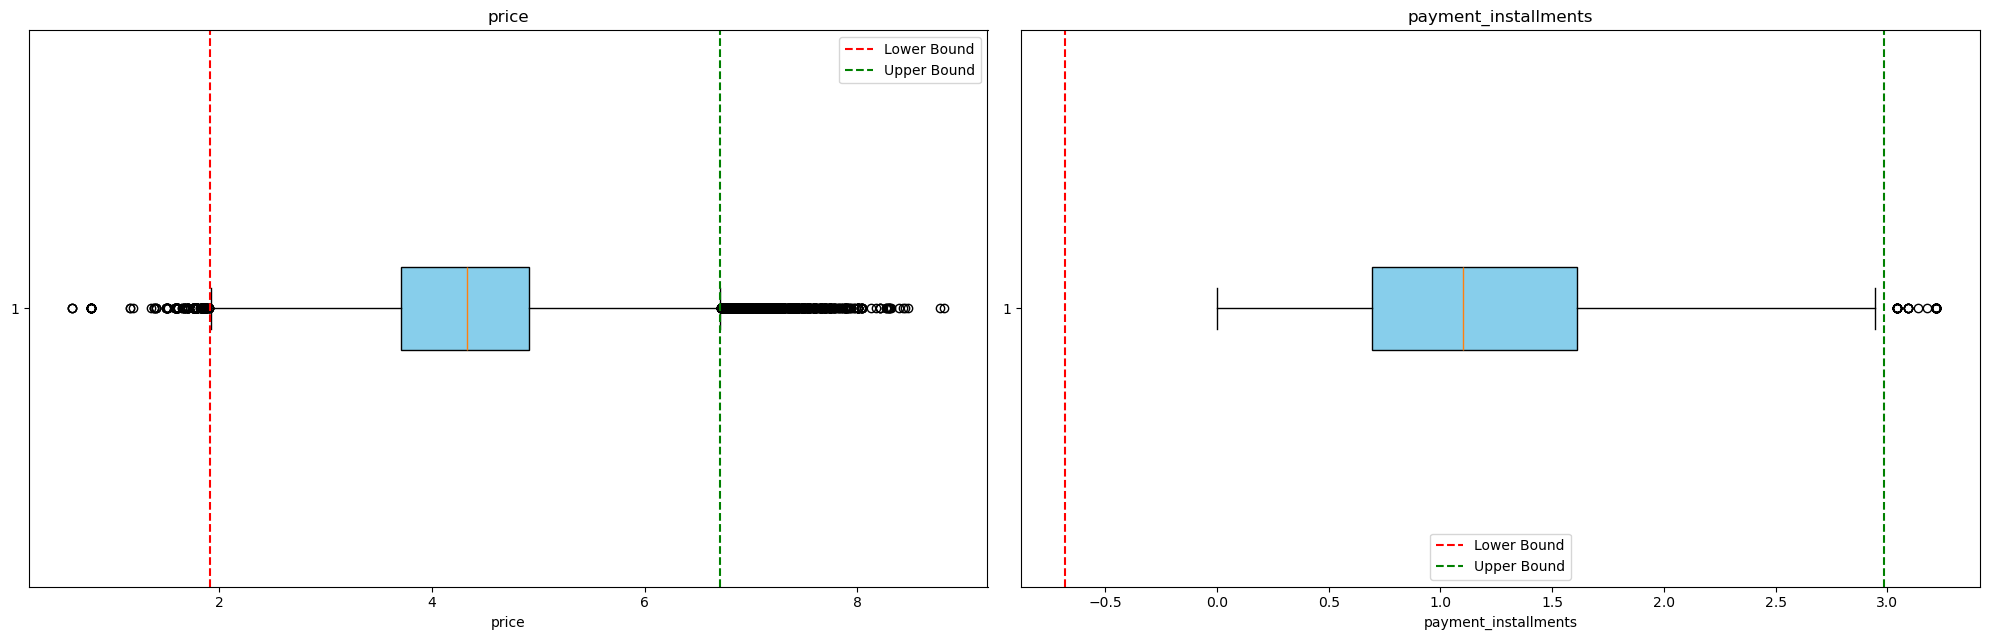

In [22]:
columns_to_check = ['price', 'payment_installments']
detect_outliers_iqr(2, df, columns_to_check)

so some outliers still exists in price and payment_installments , let's perform clipping

In [23]:
# Define the clipping function using IQR
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Clip outliers for price
clip_outliers(df, 'price')

# Clip outliers for payment_installments
clip_outliers(df, 'payment_installments')

checking that the outliers are successfully clipped

Outliers in 'price': 0
Outliers in 'payment_installments': 0


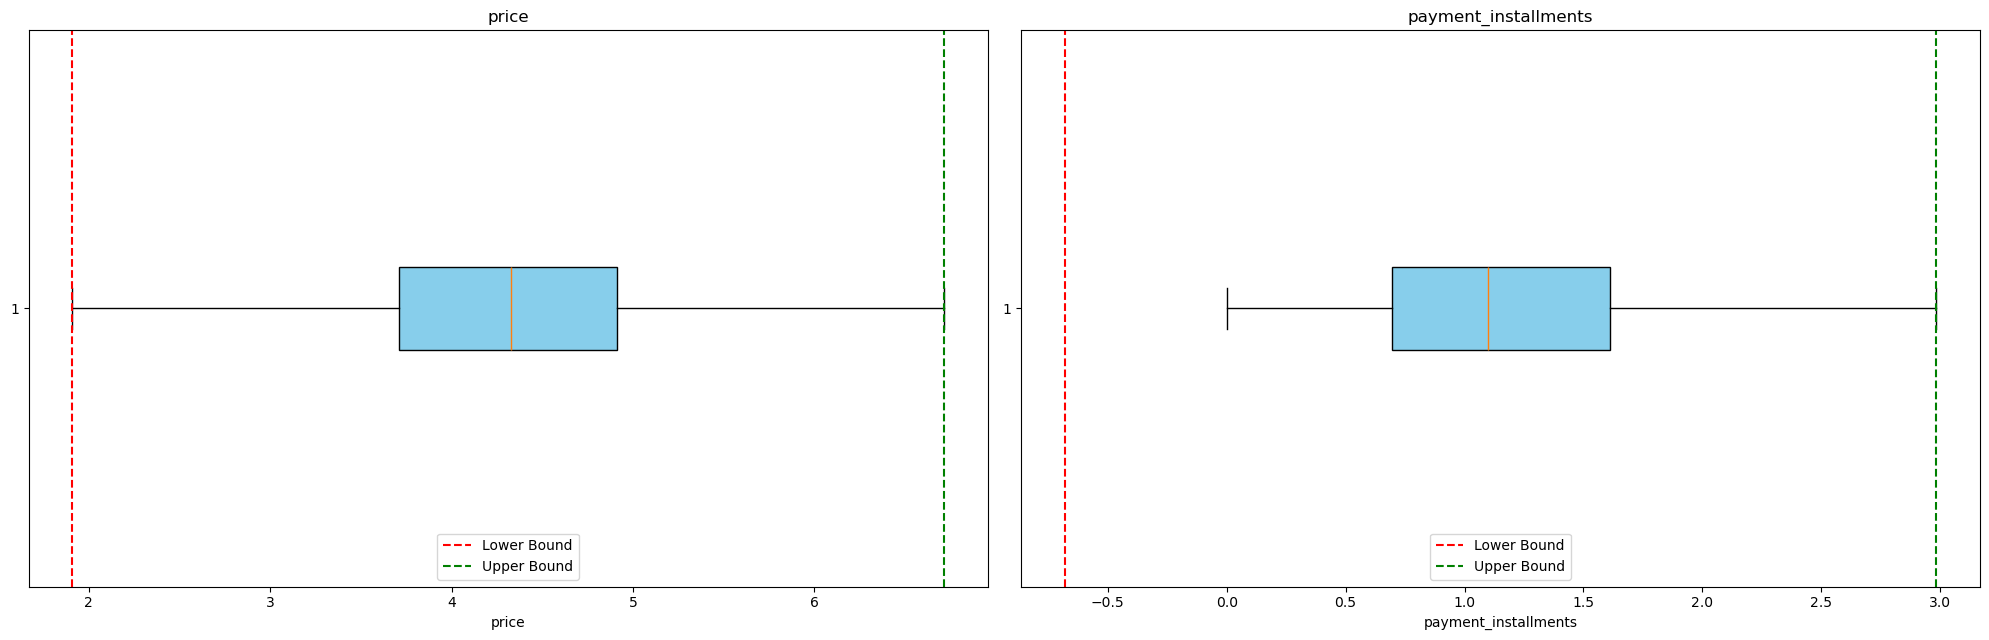

In [24]:
columns_to_check = ['price', 'payment_installments']
detect_outliers_iqr(2, df, columns_to_check)

# Product Performance Analysis

Top 10 product categories

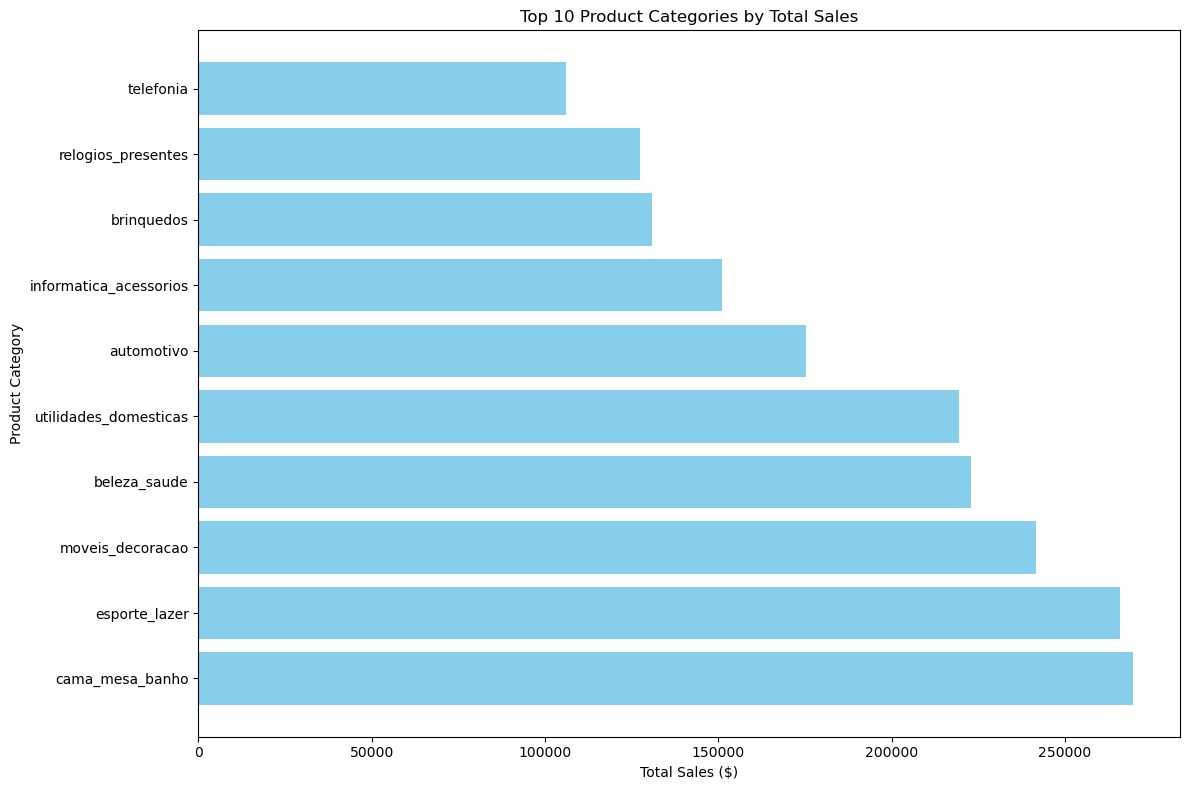

In [25]:
df['total_sales'] = df['price'] * df['freight_value']

# Exclude rows with "unknown" in the product_category_name column
df_filtered = df[df['product_category_name'] != 'Unknown']

# Calculate total sales per category

# Group by product_category_name and calculate total sales
df_sales_by_category = (
    df_filtered.groupby('product_category_name', as_index=False , observed=False)
    .agg(total_sales=('total_sales', 'sum'))
    .sort_values(by='total_sales', ascending=False)
)

# Get the top 10 categories by total sales
df_top_10 = df_sales_by_category.head(10)

# Create a bar chart for top 10 product categories
plt.figure(figsize=(12, 8))
plt.barh(df_top_10['product_category_name'], df_top_10['total_sales'], color='skyblue')
plt.title('Top 10 Product Categories by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

Revenue by payment type

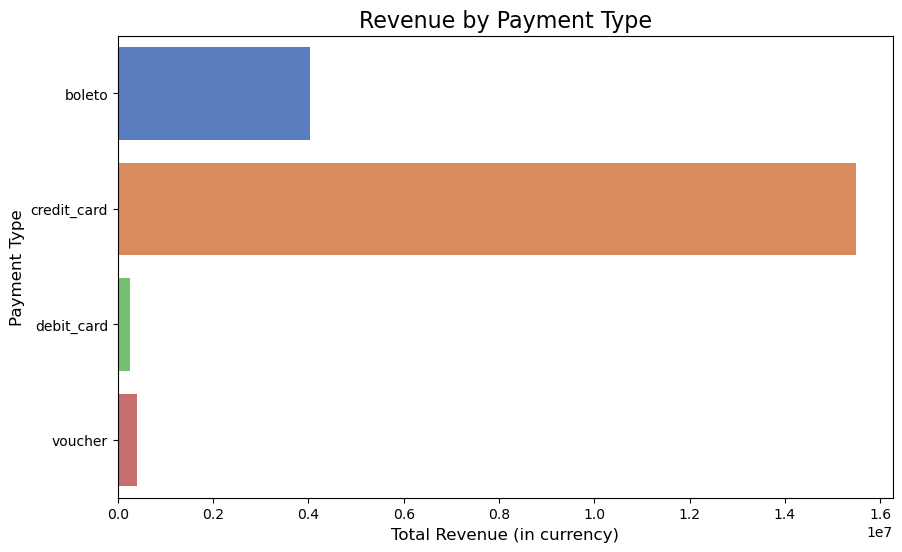

In [26]:
payment_revenue = df.groupby('payment_type' , observed=False)['payment_value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=payment_revenue, x='payment_value', y='payment_type', palette='muted' , hue= 'payment_type' , legend = False
)
plt.title('Revenue by Payment Type', fontsize=16)
plt.xlabel('Total Revenue (in currency)', fontsize=12)
plt.ylabel('Payment Type', fontsize=12)
plt.show()


Top 10 cities with most orders

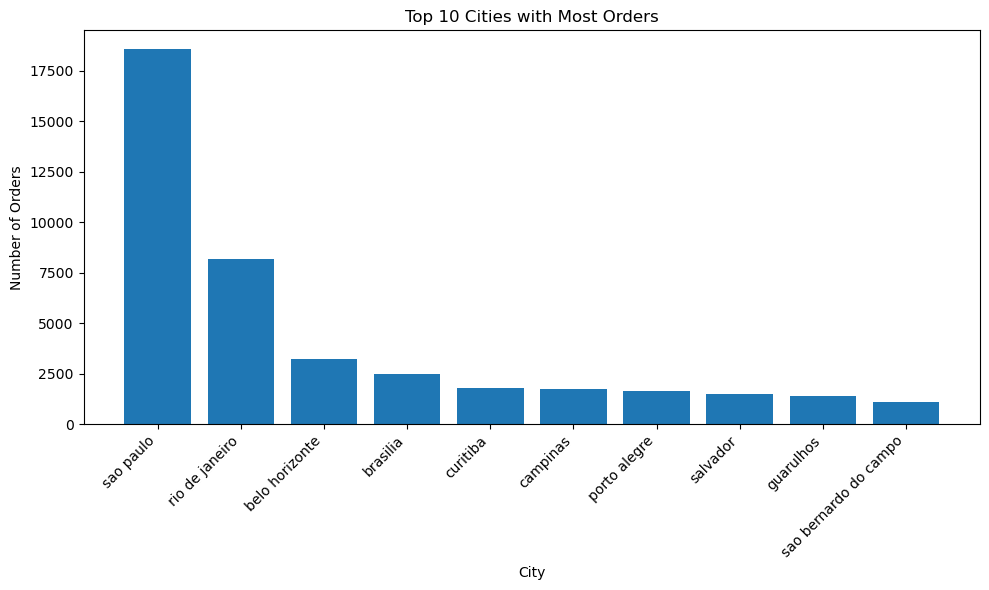

In [27]:
# Group by 'customer_city' and count the number of orders
city_orders = df.groupby('customer_city' , observed=False)['order_id'].count().reset_index()
city_orders.columns = ['city', 'order_count']

# Sort cities by order count in descending order
city_orders = city_orders.sort_values(by='order_count', ascending=False)

# Select top 10 cities with the most orders
top_cities = city_orders.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_cities['city'], top_cities['order_count'])
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('Top 10 Cities with Most Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

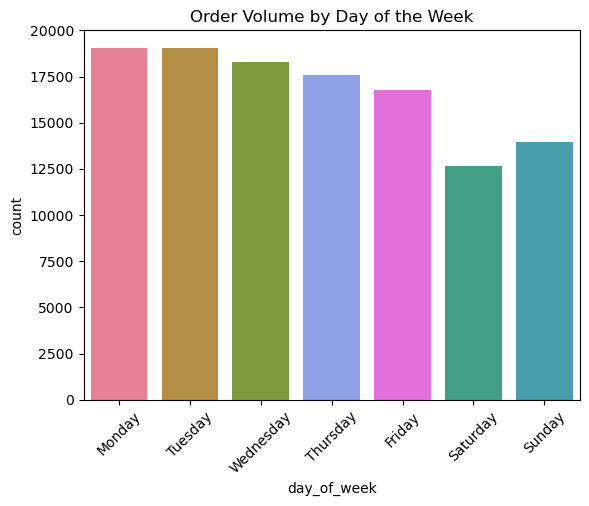

In [28]:
df['day_of_week'] = df['order_purchase_timestamp'].dt.day_name()
sns.countplot(data=df, x='day_of_week', palette='husl', order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] , hue='day_of_week' , legend= False)
plt.title("Order Volume by Day of the Week")
plt.xticks(rotation = 45)
plt.show()


# Customer segmentaion

let's engineer some features to be used in the clustering process , which are total_spent , total_orders , avg_review_score and avg_payment_installments

In [29]:
customer_features = df.groupby('customer_unique_id').agg(
    total_spent=('price', 'sum'),
    avg_review_score=('review_score', 'mean'),
    avg_payment_installments=('payment_installments', 'mean')
).reset_index()

# Fill any remaining nulls in aggregated features
customer_features.fillna(0, inplace=True)

In [30]:
customer_features.head()

,customer_unique_id,total_spent,avg_review_score,avg_payment_installments
0,0000366f3b9a7992bf8c76cfdf3221e2,4.874434,5.0,2.197225
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2.990720,4.0,0.693147
2,0000f46a3911fa3c0805444483337064,4.248495,3.0,2.197225
3,0000f6ccb0745a6a4b88665a16c9f078,3.295466,4.0,1.609438
4,0004aac84e0df4da2b147fca70cf8255,5.198497,5.0,1.945910


In [31]:
customer_features.describe()

,total_spent,avg_review_score,avg_payment_installments
count,94720.000000,94720.000000,94720.000000
mean,5.364666,4.102241,1.177449
std,3.648310,1.326747,0.567607
min,1.909946,1.000000,0.000000
25%,3.929863,4.000000,0.693147
50%,4.614130,5.000000,1.098612
75%,5.398163,5.000000,1.609438
max,250.052361,5.000000,2.983874


let's check the distribution of this new engineered features

In [32]:
skew(customer_features[['total_spent'  , 'avg_review_score' , 'avg_payment_installments']], bias=False) 

array([13.25531897, -1.39025941,  0.81787058])

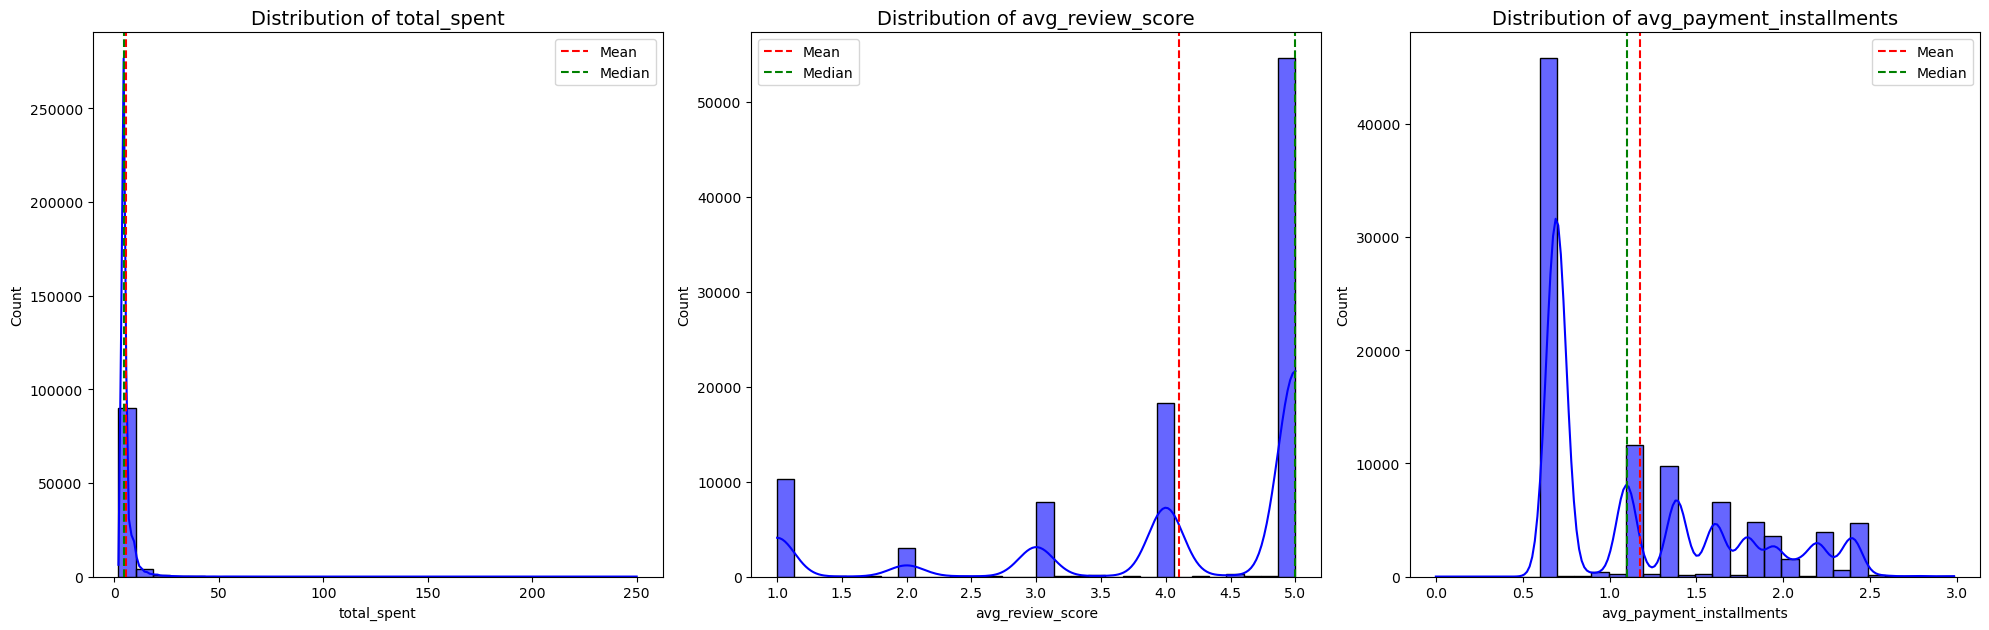

In [33]:
dist_plot(3, customer_features, variables= ['total_spent'  , 'avg_review_score' , 'avg_payment_installments'])

oooh !!!!! skewness appeared again , let's fix it using different transformation techniques according to each feature

In [34]:
customer_features["total_spent"] = 1/(customer_features["total_spent"]) # reciprocal transformation

customer_features["avg_review_score"] , lamda  = boxcox(customer_features["avg_review_score"]) # boxcox transformation

customer_features["avg_payment_installments"] = np.log1p(customer_features["avg_payment_installments"]) # log transformation

In [35]:
skew(customer_features[['total_spent' , 'avg_review_score' , 'avg_payment_installments']], bias=False) 

array([ 0.0750504 , -0.8138111 ,  0.59368565])

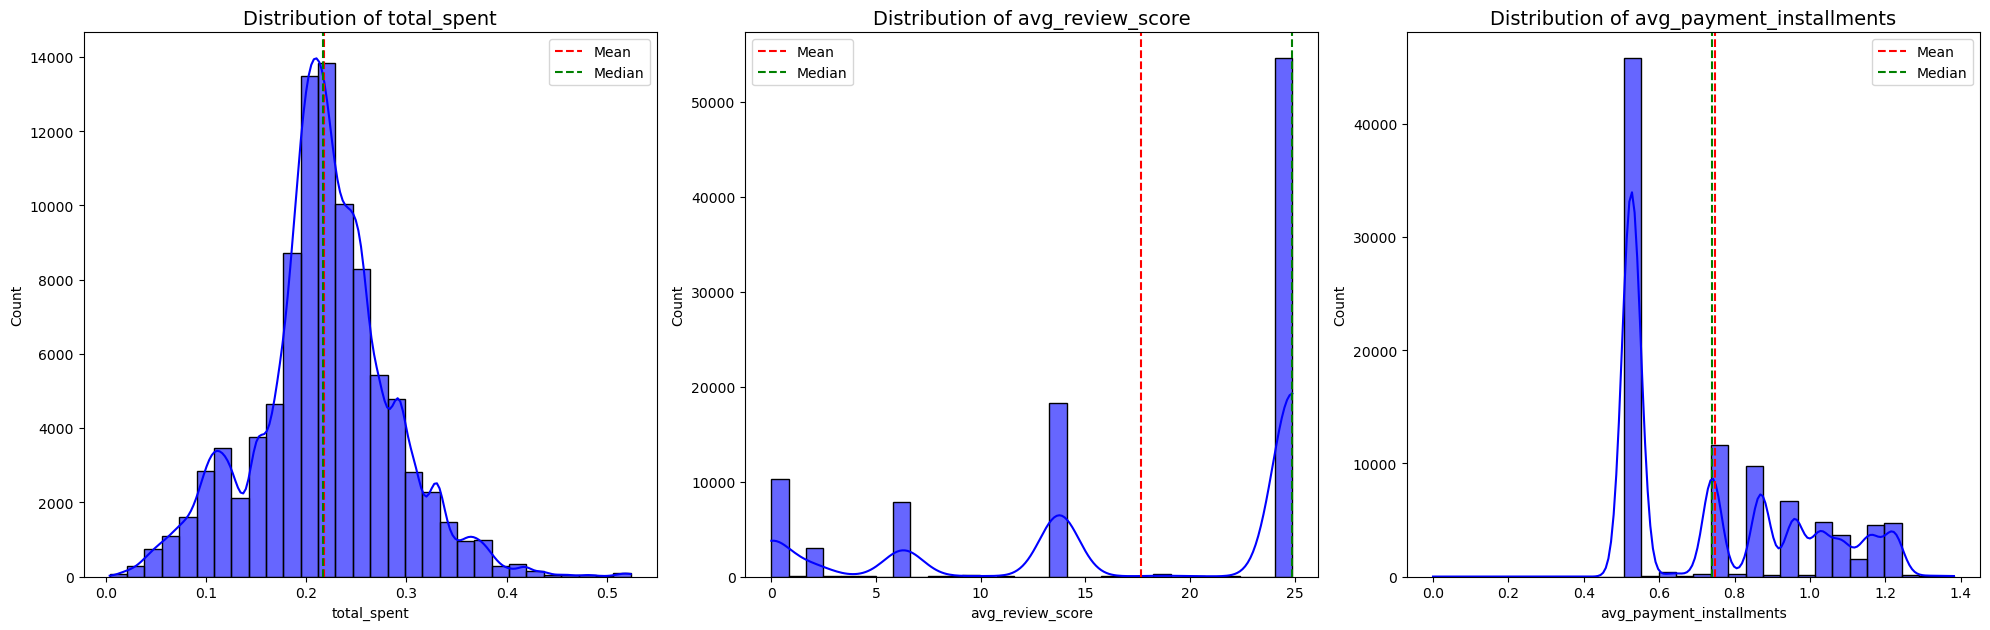

In [36]:
dist_plot(3, customer_features, variables= ['total_spent' , 'avg_review_score' , 'avg_payment_installments'])

now let's check for outliers in the new features

Outliers in 'total_spent': 5497
Outliers in 'avg_review_score': 0
Outliers in 'avg_payment_installments': 0


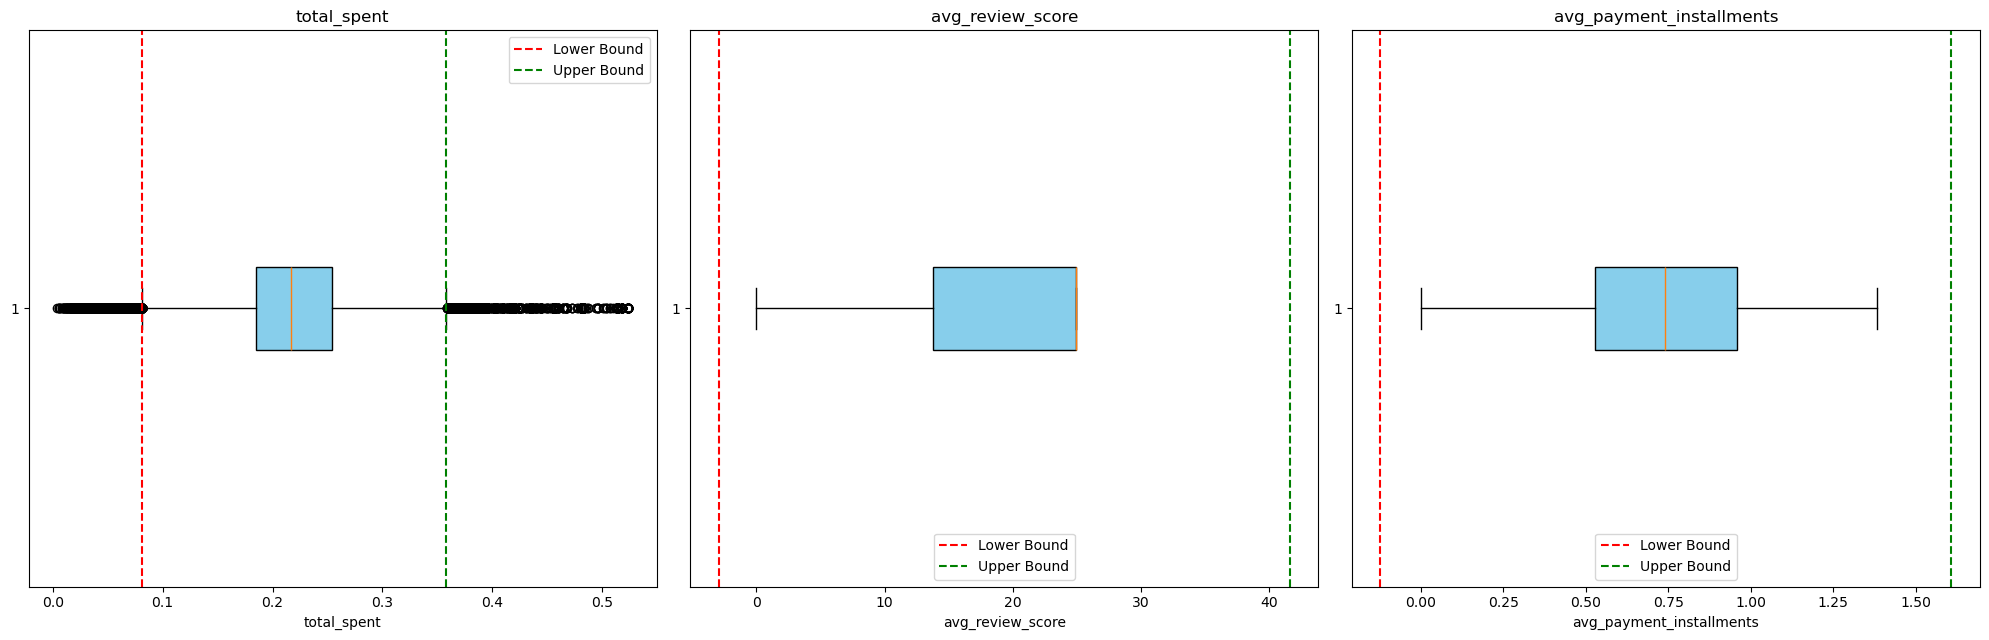

In [37]:
columns_to_check = ['total_spent', 'avg_review_score' , 'avg_payment_installments']
detect_outliers_iqr(3, customer_features, columns_to_check)

outliers exists in the total_spent feature , let's clip them

In [38]:
# Clip outliers for total_spent
clip_outliers(customer_features, 'total_spent')

Outliers in 'total_spent': 0


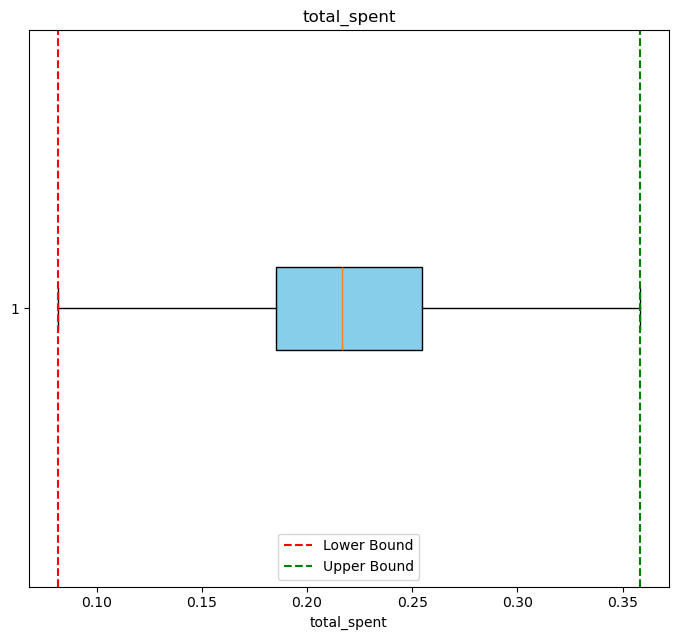

In [39]:
columns_to_check = ['total_spent']
detect_outliers_iqr(3, customer_features, columns_to_check)

determinig the best number of clusters using Elbow method

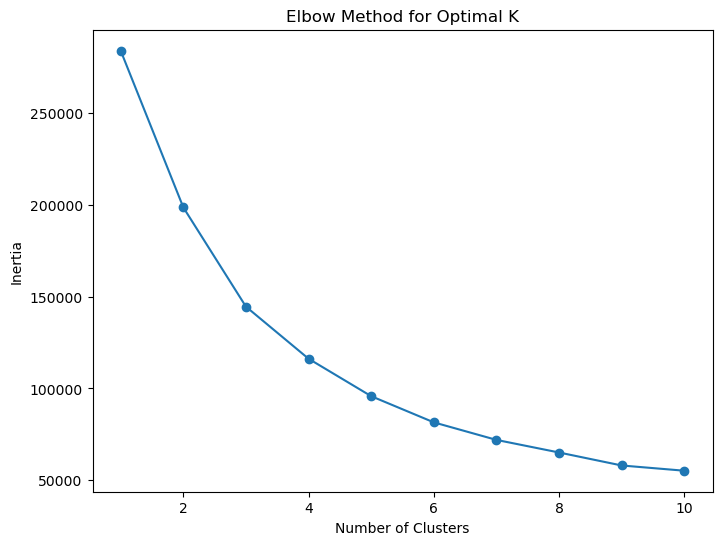

In [40]:
# Select features for clustering
X = customer_features[['total_spent', 'avg_review_score', 'avg_payment_installments']]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Perform K means with 3 clusters

In [41]:
# Fit K-Means with optimal clusters (assume 3 for this example)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(X_scaled)

# View cluster distribution
print(customer_features['cluster'].value_counts())

cluster
0    42905
1    27448
2    24367
Name: count, dtype: int64


Applying TSNE to reduce dimensions to two for 2d cluster visualization

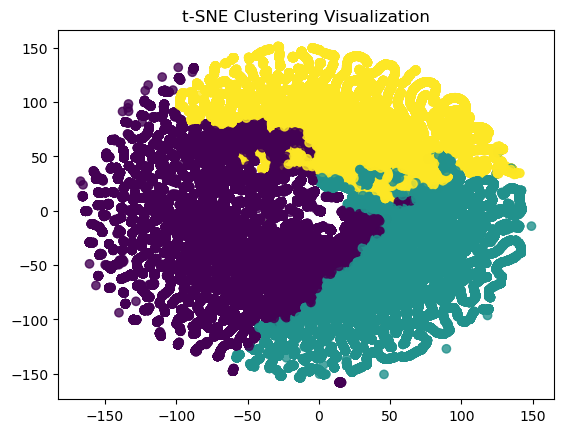

In [42]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.8)
plt.title("t-SNE Clustering Visualization")
plt.show()

Now let's have a look at the characteristics of each of these 3 cluster

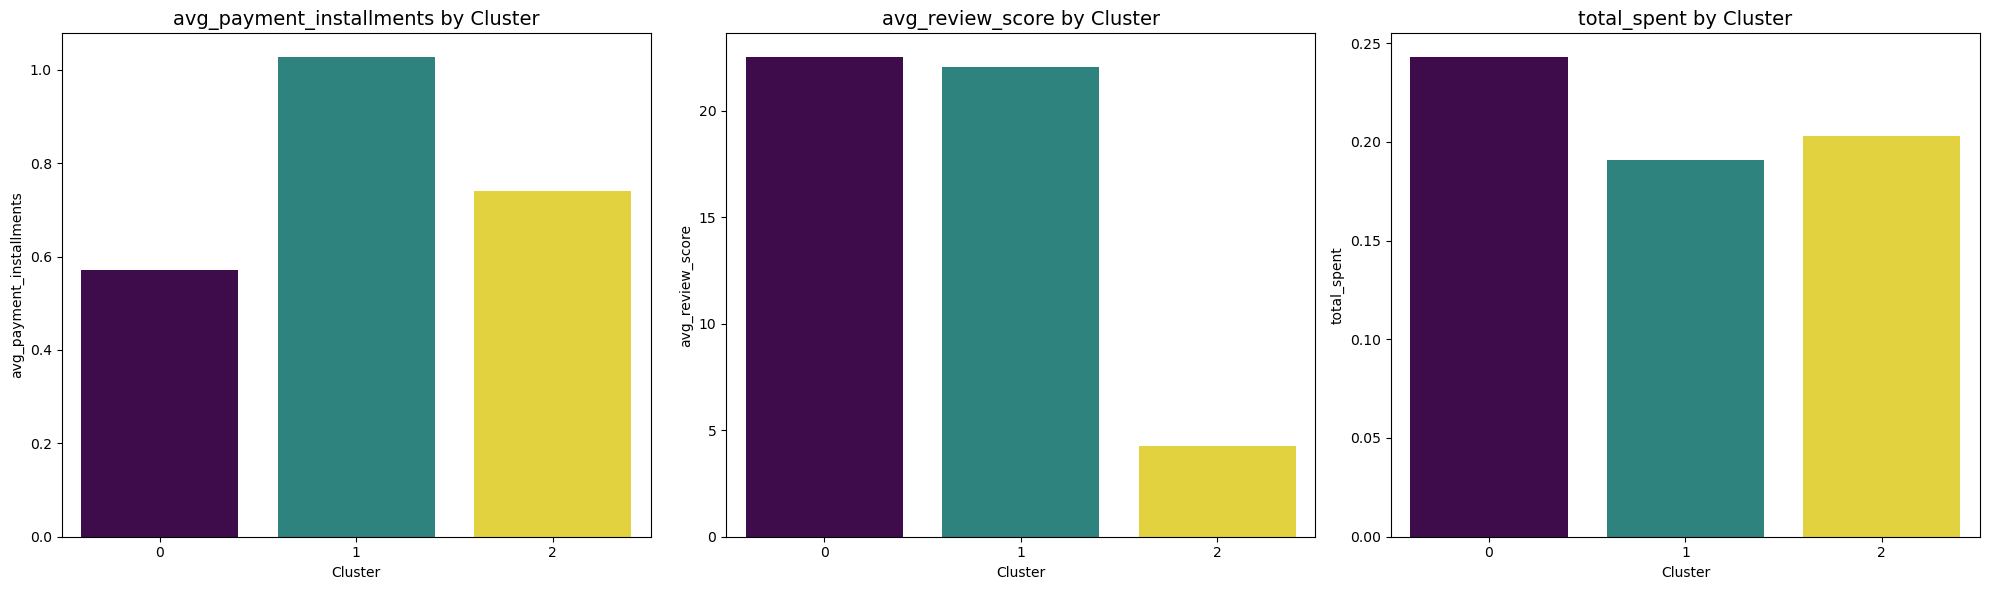

In [43]:
# Filter numeric columns, excluding 'cluster'
numeric_columns = customer_features.select_dtypes(include=['number']).columns.difference(['cluster'])

# Group data by clusters and calculate means of numerical features
cluster_summary = customer_features.groupby('cluster')[numeric_columns].mean()

# Set the number of features and grid size dynamically
num_features = len(cluster_summary.columns)
ncols = 3  # Number of columns in the grid
nrows = (num_features // ncols) + (num_features % ncols > 0)  # Calculate rows dynamically

# Set up the figure
plt.figure(figsize=(20, 6 * nrows))

# Loop through each feature to create a bar chart
for i, column in enumerate(cluster_summary.columns):
    plt.subplot(nrows, ncols, i + 1)  # Adjust grid size dynamically
    sns.barplot(x=cluster_summary.index, y=cluster_summary[column], palette='viridis' , hue=cluster_summary.index , legend=False)
    plt.title(f'{column} by Cluster', fontsize=14)
    plt.xlabel('Cluster')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


# Key Takeaways

## Clustering Key Takeaways

#### Cluster 0 

- Customers in this cluster have the ***lowest average payment installments***, indicating they prefer to pay for their purchases in fewer installments or all at once , 
- They provide the ***highest average review scores***, suggesting high satisfaction with their purchases.
- They have the ***highest total spending***, marking them as high-value customers who are both satisfied and spend significantly.

#### Cluster 1

- Customers in this cluster have the ***highest average payment installments***, indicating a preference for installment-based payments, which may reflect budget-conscious purchasing behavior.
- They provide ***moderate average review scores***, showing decent satisfaction with their experiences.
- Their ***total spending is moderate***, making them mid-tier customers in terms of value.

#### Cluster 2

- Customers in this cluster have ***moderate average payment installments***, suggesting they balance between lump-sum payments and installment payments.
- They provide the ***lowest average review scores***, indicating dissatisfaction or issues with their purchases.
- Despite their dissatisfaction, their ***total spending is moderate***, making them a cluster that could benefit from targeted strategies to improve their experience.

### Suggested Actions

#### Cluster 0 (High-value, satisfied customers)

- Focus on retention strategies, such as loyalty programs or exclusive offers.
- Gather feedback to understand what drives their satisfaction and spending habits.

#### Cluster 1 (Mid-value, moderate satisfaction)

- Target them with installment-friendly payment options and campaigns to boost satisfaction.
- Offer personalized incentives to increase spending.

#### Cluster 2 (Moderate-value, low satisfaction)

- Investigate the reasons behind their low review scores and address the underlying issues (e.g., product quality, service problems).
- Provide post-purchase support and targeted offers to improve their perception and encourage higher spending.

## Product Performance analysis Key Takeaways

- The categories **"cama, mesa, banho"** (bedding, tableware, and bath products) and esporte e lazer(sports accessories) leads in total sales, indicating high consumer demand.

- **Credit cards** are the **most used payment type**, generating significantly higher revenue than other payment methods.

- **São Paulo** leads by a significant margin in the number of orders, followed by **Rio de Janeiro** and **Belo Horizonte**.

- Order volume is **consistent** and **high** from **Monday to Thursday**, with a **slight dip on Friday* , The lowest order volumes are observed on **weekends*, particularly **Saturday**.

### Suggested Actions
#### Expand Inventory for High-Performing Categories:

- Prioritize increasing stock and variety in "cama, mesa, banho" and "esporte e lazer" to meet demand and maintain customer satisfaction.
- Introduce exclusive or premium products in these categories to boost sales further.

#### Market Underperforming Categories:

- Invest in marketing campaigns to highlight the benefits of "informatica_acessorios" and "telefonia" products.
- Offer bundles or cross-category promotions to increase their visibility and sales (e.g., "buy a laptop, get a discount on accessories").

#### Focus on Lifestyle Branding:

- Enhance branding for categories like "moveis_decoracao" and "beleza_saude" by tying them to aspirational lifestyle themes.
- Use social media influencers and content marketing to showcase these products in real-life scenarios.

#### Analyze Trends in Emerging Categories:

- Monitor sales in mid-tier categories like "utilidades_domesticas" to identify potential growth opportunities.
- Experiment with seasonal campaigns or product launches in these categories to boost performance.

#### Leverage Credit Card Promotions:

- Focus on offering promotions, discounts, or cashback for credit card users to further capitalize on this dominant payment type.
- Partner with banks to create exclusive credit card offers.

#### Increase Awareness and Accessibility of Boleto:

- Educate customers about the convenience and security of using boleto to boost adoption.
- Offer incentives like small discounts or loyalty points for boleto payments to encourage more usage.

#### Promote Debit Card and Voucher Usage:

- Create campaigns or partnerships encouraging debit card users to make transactions, potentially through waived fees or extra rewards.
- Consider expanding the range of voucher options and target markets where voucher systems are commonly used.

#### City-Specific Strategies:

- Focus marketing efforts and promotional campaigns on São Paulo and Rio de Janeiro, as they are the top-performing cities.
- Investigate potential growth opportunities in cities like Brasília, Curitiba, and Campinas to improve order volumes.

#### Optimizing Weekday Performance:

- Enhance logistics and inventory management from Monday to Thursday to maintain efficiency during peak order days.
- Consider introducing mid-week promotions to sustain high order volumes.

#### Weekend Engagement:

- Develop targeted campaigns or discounts to boost weekend sales, particularly on Saturdays.
- Explore customer preferences and potential barriers to ordering during weekends.